In [2]:
# Q1 Read the file to a dataframe. Remember to keep the product metadata in a distinct dataframe as well.
import pandas as pd
import gzip

# Define functions to parse and load data
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        # Replace "true" with True and "false" with False in the string
        l = l.replace(b"true", b"True").replace(b"false", b"False")
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

# Load review data into a dataframe
df_reviews = getDF('Electronics_5.json.gz')

# Load metadata into a dataframe
df_metadata = getDF('meta_Electronics.json.gz')

# Save both dataframes as pickle files
df_reviews.to_pickle('reviews.pkl')
df_metadata.to_pickle('metadata.pkl')


In [2]:
import pandas as pd
# Load the saved pickle files
df_reviews = pd.read_pickle('reviews.pkl')
df_metadata = pd.read_pickle('metadata.pkl')

# Remove null values
df_reviews_cleaned = df_reviews.dropna()
df_metadata_cleaned = df_metadata.dropna()



In [2]:
# Display the head of the cleaned DataFrames
print("Head of the cleaned reviews DataFrame:")
print(df_reviews_cleaned.head())



Head of the cleaned reviews DataFrame:
      overall vote  verified   reviewTime      reviewerID        asin  \
1870      3.0    4      True  04 30, 2017  A2G54JDJVBUBVS  1464120153   
3036      5.0    3     False  01 21, 2016   AJOSEGUT95AU2  8866139874   
5067      5.0   58      True   03 5, 2016  A26S2DYJWSP3T1  B000001ON6   
6681      4.0   16      True  05 13, 2016  A2665PMQ6QIEA7  B00000J1U5   
6743      1.0    5      True  10 30, 2015  A26UFBBEXEC4I7  B00000J1U5   

                               style          reviewerName  \
1870  {'Format:': ' Misc. Supplies'}                 Derek   
3036  {'Format:': ' Misc. Supplies'}  Julie Ann (Cuemommy)   
5067     {'Format:': ' Electronics'}                   Las   
6681             {'Style:': ' DB15'}                erple2   
6743             {'Style:': ' DB15'}         Richfiddler11   

                                             reviewText  \
1870  Works perfectly for my Physics class requiring...   
3036  Apparently the other revi

In [4]:
print(df_reviews.columns)


Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image'],
      dtype='object')


In [3]:
print("\nHead of the cleaned metadata DataFrame:")
print(df_metadata_cleaned.head())


Head of the cleaned metadata DataFrame:
                                              category  \
838  [Electronics, Computers & Accessories, Data St...   
839  [Electronics, Computers & Accessories, Data St...   
840  [Electronics, Camera & Photo, Video Surveillan...   
841  [Electronics, Computers & Accessories, Data St...   
842  [Electronics, Computers & Accessories, Data St...   

                                                 tech1  \
838                                                      
839                                                      
840                                                      
841                                                      
842   class="a-keyvalue prodDetTable" role="present...   

                                           description fit  \
838  [This flash drive is a fun and convenient way ...       
839  [Hand-crafted water diamond flash drive(8GB)wo...       
840  [Our Recommendation: Our 4 channel DVR (8CH, 1...       
841  [Hand-cr

In [1]:
# Q2 and Q3  
# 2. Choose a product of your choice. Let's say ‘Headphones’.
# 3. Report the total number of rows for the product. Perform appropriate pre-processing as handling missing values, duplicates and other.

import pandas as pd

# Load the metadata DataFrame from the saved pickle file
df_metadata = pd.read_pickle('metadata.pkl')
# df_metadata_cleaned = df_metadata.dropna()

# Filter the metadata DataFrame for 'Headphones'
# df_headphones = df_metadata[df_metadata['title'].str.contains('Headphone', case=False)]

df_headphones = df_metadata[df_metadata['title'].str.lower().str.contains('headphone',case = False)]

total_rowss = len(df_headphones)
print("Total number of rows for 'headphones':", total_rowss)

# Handle missing values by dropping rows with missing values
df_headphones.dropna(inplace=True)

# Reset index after dropping rows
df_headphones.reset_index(drop=True, inplace=True)

# Display the head of the preprocessed DataFrame
print("Head of preprocessed df_headphones:")
print(df_headphones.head())
# 
# Save the preprocessed DataFrame
df_headphones.to_pickle('headphones_metadata.pkl')


Total number of rows for 'Headphones': 27412
Head of preprocessed df_headphones:
                                       category tech1  \
0                     [Electronics, Headphones]         
1  [Electronics, Headphones, Earbud Headphones]         
2  [Electronics, Headphones, Earbud Headphones]         
3  [Electronics, Headphones, On-Ear Headphones]         
4  [Electronics, Headphones, On-Ear Headphones]         

                                         description fit  \
0                                                 []       
1  [, <b>True High Definition Sound:</b><br />Wit...       
2  [Ear buds fit snug in the ear. Provides great ...       
3  [Use with any audio source, compact headphones...       
4  [The stylish HP200S Stereo Line silver headpho...       

                                               title also_buy tech2  \
0                             Grado SR60i Headphones       []         
1  Bluetooth Workout Headphones for Running and G...       []         
2 

C:\Users\asus\AppData\Local\Temp\ipykernel_24224\4225826720.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_headphones.dropna(inplace=True)


 Q 4.

In [9]:
df_headphones.head(1)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Electronics, Headphones]",,[],,Grado SR60i Headphones,[],,Grado,[],"[>#3,014,188 in Cell Phones &amp; Accessories ...","[B00KYTNU9U, B01MCY4YVL, B00L1LXOWS, B00BWH7TI...",All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","November 6, 2009",,8814117446,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}


In [11]:


# 4. Obtain Descriptive Statistics of products

# a. Number of Reviews
num_reviews = df_reviews[df_reviews['asin'].isin(df_headphones['asin'])].shape[0]

# b. Average Rating Score
average_rating = df_reviews[df_reviews['asin'].isin(df_headphones['asin'])]['overall'].mean()

# c. Number of Unique Products
num_unique_products = df_headphones['asin'].nunique()

# d. Number of Good Rating (>=3)
num_good_ratings = df_reviews[(df_reviews['asin'].isin(df_headphones['asin'])) & (df_reviews['overall'] >= 3)].shape[0]

# e. Number of Bad Ratings (<3)
num_bad_ratings = df_reviews[(df_reviews['asin'].isin(df_headphones['asin'])) & (df_reviews['overall'] < 3)].shape[0]

# f. Number of Reviews Corresponding to Each Rating
num_reviews_per_rating = df_reviews[df_reviews['asin'].isin(df_headphones['asin'])]['overall'].value_counts().sort_index()

# Display the descriptive statistics
print("Descriptive Statistics for 'Headphones':")
print("a. Number of Reviews:", num_reviews)
print("b. Average Rating Score:", average_rating)
print("c. Number of Unique Products:", num_unique_products)
print("d. Number of Good Ratings (>=3):", num_good_ratings)
print("e. Number of Bad Ratings (<3):", num_bad_ratings)
print("f. Number of Reviews Corresponding to Each Rating:")
print(num_reviews_per_rating)


Descriptive Statistics for 'Headphones':
a. Number of Reviews: 411152
b. Average Rating Score: 4.112296668871853
c. Number of Unique Products: 26849
d. Number of Good Ratings (>=3): 353373
e. Number of Bad Ratings (<3): 57779
f. Number of Reviews Corresponding to Each Rating:
overall
1.0     30991
2.0     26788
3.0     40752
4.0     79149
5.0    233472
Name: count, dtype: int64


Q 5.

In [17]:
# Q 5.Preprocess the Text

# Import necessary libraries
import pandas as pd
import re
from bs4 import BeautifulSoup
import unicodedata
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not already downloaded)
nltk.download('wordnet')
nltk.download('punkt')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function to remove accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# Function to remove special characters
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Function for lemmatization
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])
    return lemmatized_text

# Function for text normalization
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Convert NaN values to empty strings
df_reviews['reviewText'] = df_reviews['reviewText'].fillna('')

# Apply preprocessing functions to the 'reviewText' column
df_reviews['clean_text'] = df_reviews['reviewText'].apply(remove_html_tags)
df_reviews['clean_text'] = df_reviews['clean_text'].apply(remove_accented_chars)
df_reviews['clean_text'] = df_reviews['clean_text'].apply(remove_special_characters)
df_reviews['clean_text'] = df_reviews['clean_text'].apply(lemmatize_text)
df_reviews['clean_text'] = df_reviews['clean_text'].apply(normalize_text)

# Display the preprocessed text
print(df_reviews['clean_text'].head())

# Save the 'clean_text' column in pickle form
df_reviews['clean_text'].to_pickle('clean_text.pkl')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\asus\AppData\Local\Temp\ipykernel_6944\2548125606.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
C:\Users\asus\AppData\Local\Temp\ipykernel_6944\2548125606.py:19: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.752.0_x64__qbz5n2kfra8p0\Lib\html\parser.py

0    this is the best novel i have read in or year ...
1    pages and page of introspection in the style o...
2    this is the kind of novel to read when you hav...
3    what gorgeous language what an incredible writ...
4    i wa taken in by review that compared this boo...
Name: clean_text, dtype: object


In [1]:

import pandas as pd
# Load the 'clean_text' column from the pickle file
clean_text = pd.read_pickle('clean_text.pkl')

# Print the size of the loaded 'clean_text' column
print("Size of clean_text column:", len(clean_text))

# Print the loaded 'clean_text' column
print(clean_text.head())

Size of clean_text column: 6739590
0    this is the best novel i have read in or year ...
1    pages and page of introspection in the style o...
2    this is the kind of novel to read when you hav...
3    what gorgeous language what an incredible writ...
4    i wa taken in by review that compared this boo...
Name: clean_text, dtype: object


In [3]:
import re

def expand_acronyms(text):
    def replace_acronym(match):
        acronym = match.group(0)
        expanded = acronym_dict.get(acronym.lower())
        return expanded if expanded else acronym

    acronym_dict = {
        "u.s.": "united states",
        "u.s.a.": "united states of america",
        "u.k.": "united kingdom",
        "e.g.": "for example",
        "i.e.": "that is",
        "a.m.": "ante meridiem",
        "p.m.": "post meridiem",
        "etc.": "et cetera",
        "vs.": "versus",
        "inc.": "incorporated",
        "ltd.": "limited",
        "co.": "company",
        "corp.": "corporation",
        "dept.": "department",
        "univ.": "university",
        "govt.": "government",
        "intl.": "international",
        "nat'l": "national",
        "org.": "organization",
        "assn.": "association",
        "llc.": "limited liability company",
        "dr.": "doctor",
        "mr.": "mister",
        "mrs.": "missus",
        "ms.": "miss",
        "prof.": "professor",
        "rev.": "reverend",
        "sr.": "senior",
        "jr.": "junior",
        "ft.": "feet",
        "in.": "inch",
        "lb.": "pound",
        "oz.": "ounce",
        "kg.": "kilogram",
        "cm.": "centimeter",
        "km.": "kilometer",
        "mi.": "mile",
        # Add more acronyms and their expansions here
    }

    return re.sub(r'\b\w+\.\w+\.?', replace_acronym, text)

# Apply the function to the 'clean_text' column
clean_text = clean_text.apply(expand_acronyms)

In [47]:
print(df_reviews.columns)


Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'summary', 'unixReviewTime', 'image'],
      dtype='object')


In [24]:
print(df_metadata.columns)

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')


In [25]:

print(df_headphones.columns)

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')


In [ ]:
# Q6.

In [8]:
# # a. Top 20 most reviewed brands:
top_20_most_reviewed_brands = df_headphones['brand'].value_counts().head(20)
print("Top 20 most reviewed brands in the headphone category:")
print(top_20_most_reviewed_brands)


Top 20 most reviewed brands in the headphone category:
brand
Sony              861
Sennheiser        390
Audio-Technica    370
JVC               367
Philips           330
Generic           319
Beats             309
Skullcandy        294
Panasonic         276
VOWSVOWS          266
Geekria           234
Koss              177
ebasy             163
Monster           143
Bose              137
Urbanears         135
                  134
Besiva            133
AKG               112
JBL               106
Name: count, dtype: int64


In [9]:
# # a. Top 20 most reviewed brands:


# top_20_most_reviewed_brands = df_metadata[df_metadata['category'].apply(lambda x: 'Headphones' in x)]\
#     .groupby('brand').size().nlargest(20)
# print("Top 20 most reviewed brands:")
# print(top_20_most_reviewed_brands)

In [10]:
# b. Top 20 least reviewed brands in the headphone category:
top_20_least_reviewed_brands = df_headphones['brand'].value_counts().tail(20)
print("Top 20 least reviewed brands in the headphone category:")
print(top_20_least_reviewed_brands)


Top 20 least reviewed brands in the headphone category:
brand
Cool knight            1
LY-TECH                1
Waterfly               1
Mobityze               1
SHQianJiaTian          1
U-Easy Tech Limited    1
B&WSC2SET              1
Rebelite               1
Generia                1
Tianhong               1
Kissmart               1
Hybrid                 1
Novodio                1
Jam Fusion             1
XT-XINTE               1
shunyou                1
RIF6                   1
eCaseUSA               1
Esky                   1
Yostyle                1
Name: count, dtype: int64


In [64]:
# # Find the most positively reviewed headphone
# most_positively_reviewed = df_reviews[df_reviews['asin'].isin(df_metadata[df_metadata['category'].apply(lambda x: 'Headphones' in x)]['asin'])]\
#     .groupby('asin')['overall'].mean().idxmax()

# # Get the brand name of the most positively reviewed headphone
# brand_name = df_metadata[df_metadata['asin'] == most_positively_reviewed]['brand'].iloc[0]

# # Get the number of ratings for the most positively reviewed headphone
# num_ratings = len(df_reviews[df_reviews['asin'] == most_positively_reviewed])

# # Get the summary of reviews for the most positively reviewed headphone
# summary_reviews = df_reviews[df_reviews['asin'] == most_positively_reviewed].head(1)['summary'].values[0]

# # Print the most positively reviewed headphone along with the brand name and summary of reviews
# print("Most positively reviewed headphone:", most_positively_reviewed)
# print("Brand name:", brand_name)
# print("Number of ratings:", num_ratings)
# print("Summary of reviews:", summary_reviews)



Most positively reviewed headphone: B0000E55DB
Brand name: BuySevenSide
Number of ratings: 5
Summary of reviews: Wonderful lamps!


In [11]:
 # c. Find the most positively reviewed headphone
 
# Filter reviews for headphones
headphone_reviews = df_reviews[df_reviews['asin'].isin(df_headphones['asin'])]

# Find the most positively reviewed headphone
most_positively_reviewed_asin = headphone_reviews.groupby('asin')['overall'].mean().idxmax()
most_positively_reviewed_headphone = df_headphones[df_headphones['asin'] == most_positively_reviewed_asin]

# Extract relevant information
asin = most_positively_reviewed_headphone.iloc[0]['asin']
brand = df_headphones[df_headphones['asin'] == asin]['brand'].values[0]

# Display the information
print("Most positively reviewed headphone:")
print(f"ASIN: {asin}")
print(f"Brand: {brand}")




Most positively reviewed headphone:
ASIN: B000053ZF1
Brand: Sony


In [12]:
#d. Count of ratings for the product over 5 consecutive years:

df_reviews['reviewYear'] = pd.to_datetime(df_reviews['reviewTime']).dt.year
ratings_count_over_years = df_reviews[df_reviews['asin'] == most_positively_reviewed_asin]\
    .groupby('reviewYear')['overall'].count()
print("Count of ratings for the most positively reviewed headphone over 5 consecutive years:")
print(ratings_count_over_years)

Count of ratings for the most positively reviewed headphone over 5 consecutive years:
reviewYear
2003    1
2007    1
2014    1
2015    1
2017    1
Name: overall, dtype: int64


In [ ]:

# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Define a function to classify ratings as 'good' or 'bad'
# def classify_sentiment(rating):
#     return 'good' if rating >= 3 else 'bad'

# # Apply the function to create a new column 'rating_sentiment'
# headphone_reviews['rating_sentiment'] = headphone_reviews['overall'].apply(classify_sentiment)

# # Assuming 'good' and 'bad' ratings are available in a column named 'rating_sentiment'
# good_reviews_text = ' '.join(headphone_reviews[headphone_reviews['rating_sentiment'] == 'good']['clean_text'])
# bad_reviews_text = ' '.join(headphone_reviews[headphone_reviews['rating_sentiment'] == 'bad']['clean_text'])

# # Create Word Clouds
# good_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(good_reviews_text)
# bad_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(bad_reviews_text)

# # Plot good Word Clouds
# plt.figure(figsize=(8, 8), facecolor=None)
# plt.imshow(good_wordcloud)
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()
# # Plot bad Word Clouds
# plt.figure(figsize=(8, 8), facecolor=None)
# plt.imshow(bad_wordcloud)
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


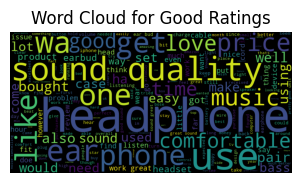

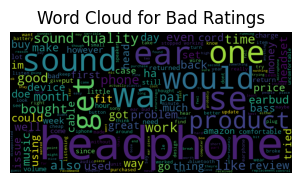

: 

In [99]:
#e. word cloud

import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download NLTK resources (if not already downloaded)
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess text
def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize tokens
    text = ' '.join(tokens)  # Join tokens back into text
    return text

# Concatenate all good and bad reviews
good_reviews = headphone_reviews[headphone_reviews['overall'] >= 3]['clean_text'].str.cat(sep=' ')
bad_reviews = headphone_reviews[headphone_reviews['overall'] < 3]['clean_text'].str.cat(sep=' ')

# Preprocess good and bad reviews
good_reviews = preprocess_text(good_reviews)
bad_reviews = preprocess_text(bad_reviews)

# Generate Word Clouds
wordcloud_good = WordCloud(width=800, height=400, stopwords=stopwords.words('english')).generate(good_reviews)
wordcloud_bad = WordCloud(width=800, height=400, stopwords=stopwords.words('english')).generate(bad_reviews)

# Plot Word Clouds
plt.figure(figsize=(8, 8), facecolor=None)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_good)
plt.title('Word Cloud for Good Ratings')
plt.axis('off')

plt.figure(figsize=(8, 8), facecolor=None)
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_bad)
plt.title('Word Cloud for Bad Ratings')
plt.axis('off')

plt.show()


In [ ]:
# import pandas as pd

# # Save 'rating_sentiment' column as a pickle file
# df_reviews['rating_sentiment'].to_pickle('rating_sentiment.pkl')

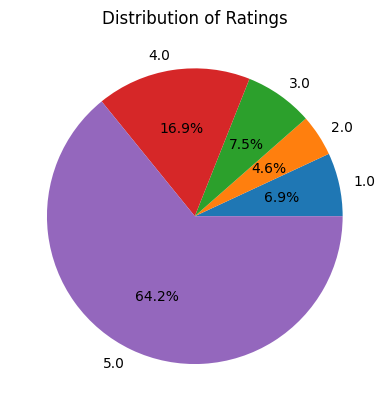

In [4]:
#f. Pie chart for Distribution of Ratings vs. the No. of Reviews:
import matplotlib.pyplot as plt
ratings_distribution = df_reviews['overall'].value_counts().sort_index()
plt.pie(ratings_distribution, labels = ratings_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

In [21]:
#g. Year with maximum reviews:
    
year_with_max_reviews = df_reviews['reviewYear'].value_counts().idxmax()
print("Year with maximum reviews:", year_with_max_reviews)

Year with maximum reviews: 2015


In [22]:
#h. Year with the highest number of customers:

year_with_highest_customers = df_reviews[df_reviews['verified'] == True]['reviewYear'].value_counts().idxmax()
print("Year with the highest number of customers:", year_with_highest_customers)

Year with the highest number of customers: 2015


In [23]:
# g. Report in which year the product got maximum reviews.
year_with_max_reviews = df_reviews['reviewYear'].value_counts().idxmax()
max_reviews_count = df_reviews['reviewYear'].value_counts().max()
print(f"The product got maximum reviews in the year {year_with_max_reviews} with {max_reviews_count} reviews.")

# h. Which year has the highest number of Customers?
year_with_highest_customers = df_reviews['reviewYear'].nunique()
highest_customers_count = df_reviews['reviewYear'].value_counts().sum()
print(f"The year {year_with_highest_customers} has the highest number of customers with {highest_customers_count} reviews.")

The product got maximum reviews in the year 2015 with 1441804 reviews.
The year 20 has the highest number of customers with 6739590 reviews.


In [ ]:
#(7.)Q7. Use a relevant feature engineering technique to model review text as Bag of Words model, TF-IDF, Hashing Vectorizer or Word2Vec.

7.0

In [28]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

# Load the 'clean_text' column from the pickle file
clean_text = pd.read_pickle('clean_text.pkl')

# Print the size of the loaded 'clean_text' column
print("Size of clean_text column:", len(clean_text))

# Print the loaded 'clean_text' column
print(clean_text.head())

# Define functions for feature engineering
def bow_vectorizer(X):
    vectorizer = CountVectorizer()
    X_bow = vectorizer.fit_transform(X)
    return X_bow, vectorizer

def tfidf_vectorizer(X):
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(X)
    return X_tfidf, vectorizer

def hashing_vectorizer(X):
    vectorizer = HashingVectorizer()
    X_hash = vectorizer.fit_transform(X)
    return X_hash, vectorizer

# Bag of Words (BoW)
X_bow, vectorizer_bow = bow_vectorizer(clean_text)

# TF-IDF
X_tfidf, vectorizer_tfidf = tfidf_vectorizer(clean_text)

# Hashing Vectorizer
X_hash, vectorizer_hash = hashing_vectorizer(clean_text)

# Save feature vectors and vectorizers
with open('bow_features.pkl', 'wb') as f:
    pickle.dump((X_bow, vectorizer_bow), f)

with open('tfidf_features.pkl', 'wb') as f:
    pickle.dump((X_tfidf, vectorizer_tfidf), f)

with open('hash_features.pkl', 'wb') as f:
    pickle.dump((X_hash, vectorizer_hash), f)



Size of clean_text column: 6739590
0    this is the best novel i have read in or year ...
1    pages and page of introspection in the style o...
2    this is the kind of novel to read when you hav...
3    what gorgeous language what an incredible writ...
4    i wa taken in by review that compared this boo...
Name: clean_text, dtype: object


In [31]:
import pandas as pd
import pickle

# Load feature vectors from pickle files
with open('bow_features.pkl', 'rb') as f:
    X_bow, vectorizer_bow = pickle.load(f)

with open('tfidf_features.pkl', 'rb') as f:
    X_tfidf, vectorizer_tfidf = pickle.load(f)

with open('hash_features.pkl', 'rb') as f:
    X_hash, vectorizer_hash = pickle.load(f)

# Display the head of each feature vectorized dataframe
print("Head of Bag of Words (BoW) feature vectorized dataframe:")
print(pd.DataFrame(X_bow[:5].toarray()))

print("\nHead of TF-IDF feature vectorized dataframe:")
print(pd.DataFrame(X_tfidf[:5].toarray()))

print("\nHead of Hashing Vectorizer feature vectorized dataframe:")
print(pd.DataFrame(X_hash[:5].toarray()))



Head of Bag of Words (BoW) feature vectorized dataframe:
   0       1       2       3       4       5       6       7       8       \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   9       ...  959908  959909  959910  959911  959912  959913  959914  \
0       0  ...       0       0       0       0       0       0       0   
1       0  ...       0       0       0       0       0       0       0   
2       0  ...       0       0       0       0       0       0       0   
3       0  ...       0       0       0       0       0       0       0   
4       0  ...       0       0       0       0       0       0       0   

   959915  959916  959917  
0      

#Q 8 and 9 Rating Class is divided into three categories

In [34]:
# Q 8 and 9

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Function to categorize ratings
def categorize_rating(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

# Load the preprocessed DataFrame
df_reviews = pd.read_pickle('reviews.pkl')

# Load the 'clean_text' column from the pickle file
clean_text = pd.read_pickle('clean_text.pkl')

# Apply rating categorization
df_reviews['Rating_Class'] = df_reviews['overall'].apply(categorize_rating)

# Prepare input features (Review Text) and target variable (Rating Class)
X = clean_text
y = df_reviews['Rating_Class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Save train and test datasets as pickle files
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')
y_train.to_pickle('y_train.pkl')
y_test.to_pickle('y_test.pkl')

# Show the head of each dataset
print("Head of X_train:")
print(X_train.head())

print("\nHead of X_test:")
print(X_test.head())

print("\nHead of y_train:")
print(y_train.head())

print("\nHead of y_test:")
print(y_test.head())


Head of X_train:
6236830    this noci bragbook album in chartreuse ha twel...
3309991            as described and arrived in timely manner
6202350    its an okay unit but mine wa defective even in...
5318707    its very good and silent until you put it on p...
1673254                                                great
Name: clean_text, dtype: object

Head of X_test:
4677505    best extender coverage i have found for the money
1302483    amazing i have been shooting all day with this...
5073908    i bought this amp because it wa advertised on ...
200512     i collect th c european print and i use these ...
1529831    this mouse is best out of mouse we had tested ...
Name: clean_text, dtype: object

Head of y_train:
6236830    Good
3309991    Good
6202350     Bad
5318707    Good
1673254    Good
Name: Rating_Class, dtype: object

Head of y_test:
4677505       Good
1302483       Good
5073908    Average
200512        Good
1529831       Good
Name: Rating_Class, dtype: object


Q 10. Evaluation of ML model 
 10.Compare the performance of 5 Machine Learning based models on the basis of Precision, Recall, F-1 Score and Support for each of the 3 target classes distinctly.

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Load the saved train and test datasets with allow_pickle=True
X_train = pd.read_pickle('X_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_test = pd.read_pickle('y_test.pkl')

# Define a function to evaluate the performance of models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['Bad', 'Average', 'Good'])
    return report

# Initialize models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
}

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform TF-IDF vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the fitted TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Evaluate each model
for model_name, model in models.items():
    # Evaluate the model
    report = evaluate_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test)
    print(f"\n{model_name}:")
    print(report)



Multinomial Naive Bayes:
              precision    recall  f1-score   support

         Bad       0.47      0.00      0.00    126235
     Average       0.91      0.09      0.17    193926
        Good       0.82      1.00      0.90   1364737

    accuracy                           0.82   1684898
   macro avg       0.73      0.36      0.36   1684898
weighted avg       0.80      0.82      0.75   1684898


Logistic Regression:
              precision    recall  f1-score   support

         Bad       0.45      0.13      0.20    126235
     Average       0.73      0.69      0.71    193926
        Good       0.91      0.97      0.94   1364737

    accuracy                           0.88   1684898
   macro avg       0.70      0.60      0.62   1684898
weighted avg       0.85      0.88      0.86   1684898



In [36]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


# Load the saved train and test datasets with allow_pickle=True
X_train = pd.read_pickle('X_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_test = pd.read_pickle('y_test.pkl')

# Define a function to evaluate the performance of models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['Bad', 'Average', 'Good'])
    return report

# Initialize models
models = {
 'Linear SVC': LinearSVC(),
}

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Evaluate each model
for model_name, model in models.items():
    # Create a pipeline with TF-IDF vectorizer and the model
    pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('model', model)])
    # Evaluate the model
    report = evaluate_model(pipeline, X_train, X_test, y_train, y_test)
    print(f"\n{model_name}:")
    print(report)


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Linear SVC:
              precision    recall  f1-score   support

         Bad       0.52      0.06      0.11    126235
     Average       0.72      0.69      0.70    193926
        Good       0.90      0.98      0.94   1364737

    accuracy                           0.88   1684898
   macro avg       0.71      0.58      0.58   1684898
weighted avg       0.85      0.88      0.85   1684898



In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Load the preprocessed data from pickle files
X_train = pd.read_pickle('X_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_test = pd.read_pickle('y_test.pkl')

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define and train the Random Forest classifier
rf_model = RandomForestClassifier(max_depth=10)
rf_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test_tfidf)

print("Random Forest Classifier: ")
# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['Bad', 'Average', 'Good'])
print(report)


Random Forest Classifier: 


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00    126235
     Average       0.00      0.00      0.00    193926
        Good       0.81      1.00      0.90   1364737

    accuracy                           0.81   1684898
   macro avg       0.27      0.33      0.30   1684898
weighted avg       0.66      0.81      0.72   1684898



C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Load the preprocessed data from pickle files
X_train = pd.read_pickle('X_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_test = pd.read_pickle('y_test.pkl')

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define and train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = gb_model.predict(X_test_tfidf)

print("Gradient Boosting Classifier: ")
# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['Bad', 'Average', 'Good'])
print(report)


## Q 11.  Data filter out

In [95]:
import pandas as pd

# Load the reviews DataFrame from the pickle file
df_reviews = pd.read_pickle('reviews.pkl')

# Load the headphones DataFrame (assuming it's already loaded)
df_headphones = pd.read_pickle('headphones_metadata.pkl')

# Merge df_reviews and df_headphones on the 'asin' column to get the ratings for headphones
merged_df = pd.merge(df_reviews, df_headphones[['asin']], on='asin')

# Select relevant columns for the ratings DataFrame(# Merge reviews DataFrame with the subset of df_headphones to get 'item_id' and 'brand')
df_ratings = merged_df[['reviewerID', 'asin', 'overall']]
df_ratings.columns = ['user_id', 'item_id', 'rating']

# Optionally, you may want to reset the index
df_ratings.reset_index(drop=True, inplace=True)

# Display the head of df_ratings
print(df_ratings.head())

# Print columns
print("Columns of df_ratings:")
print(df_ratings.columns)

# Print size
print("Size of df_ratings (rows, columns):")
print(df_ratings.shape)

# Save df_ratings as a pickle file
df_ratings.to_pickle('ratings.pkl')


          user_id     item_id  rating
0  A15U5NUS1EY7IQ  B000001OMI     5.0
1   AHGGNAIT6BH5X  B000001OMI     5.0
2  A33HUURDJ4DVG3  B000001OMI     4.0
3   A680RUE1FDO8B  B000001OMI     5.0
4  A3OLAZKM77XR6P  B000001OMI     3.0
Columns of df_ratings:
Index(['user_id', 'item_id', 'rating'], dtype='object')
Size of df_ratings (rows, columns):
(436392, 3)


In [ ]:
# # # Remove duplicate entries based on both 'userId' and 'productId'
# unique_ratings = df_ratings.drop_duplicates(subset=['userId', 'productId'])

# # Count the number of ratings each user has given
# user_rating_counts = unique_ratings['userId'].value_counts()

# # Filter out users who have given at least 10 ratings
# users_with_10_or_more_ratings = user_rating_counts[user_rating_counts >= 10].index

# # Keep only the ratings from users with at least 10 ratings
# filtered_ratings = unique_ratings[unique_ratings['userId'].isin(users_with_10_or_more_ratings)]

# # Display the head of filtered ratings
# print(filtered_ratings.head())

# # Print the size of the filtered ratings DataFrame
# print("Size of filtered ratings (rows, columns):")
# print(unique_ratings.shape)


In [97]:
ratings = df_ratings


In [98]:
ratings

,user_id,item_id,rating
0,A15U5NUS1EY7IQ,B000001OMI,5.0
1,AHGGNAIT6BH5X,B000001OMI,5.0
2,A33HUURDJ4DVG3,B000001OMI,4.0
3,A680RUE1FDO8B,B000001OMI,5.0
4,A3OLAZKM77XR6P,B000001OMI,3.0
...,...,...,...
436387,A3E7OV7IR941JI,B01HI7D4VY,5.0
436388,A26I2RPRWOGD2V,B01HI7D4VY,3.0
436389,A3VA3VK4PO1JD,B01HJ8E11E,4.0
436390,A11TVS6FKXS80H,B01HJ8E11E,3.0


In [99]:
# Assuming you want to change the column name
ratings.rename(columns={'user_id': 'userId'}, inplace=True)
ratings.rename(columns={'item_id': 'productId'}, inplace=True)


C:\Users\asus\AppData\Local\Temp\ipykernel_2320\979539073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings.rename(columns={'user_id': 'userId'}, inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_2320\979539073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings.rename(columns={'item_id': 'productId'}, inplace=True)


In [100]:
# Check the count of unique user and product data
unique_original = (ratings.userId.nunique(), ratings.productId.nunique())
print('Count of unique Users    :', unique_original[0])
print('Count of unique Products :', unique_original[1])


Count of unique Users    : 254271
Count of unique Products : 8063


In [101]:
# Find the minimum and maximum ratings
print("The Minimum rating is:",ratings.rating.min())
print("The Maximum rating is:",ratings.rating.max())

The Minimum rating is: 1.0
The Maximum rating is: 5.0


Count of observations in each rating:
rating
5.0    248279
4.0     84253
3.0     43164
1.0     32493
2.0     28203
Name: count, dtype: int64


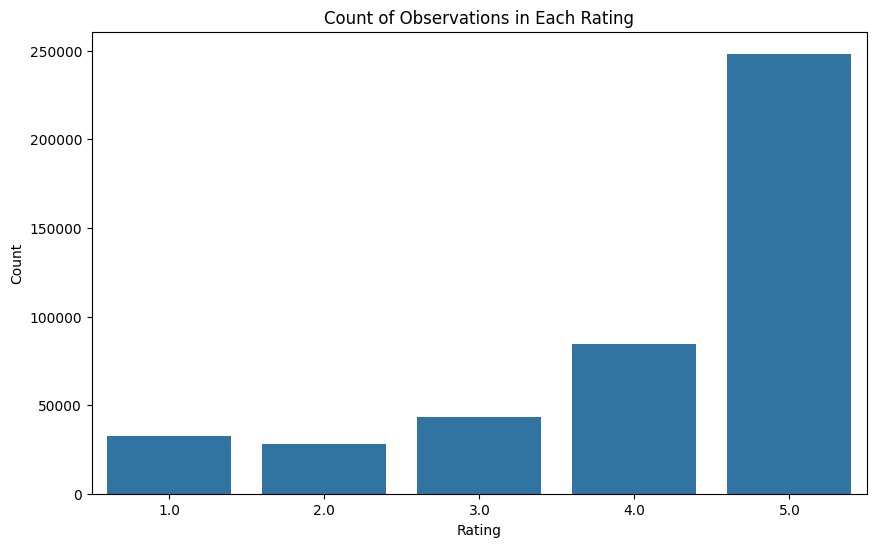

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print count of observations in each rating
print('Count of observations in each rating:')
print(ratings['rating'].value_counts())

# Visualize the count of ratings using seaborn's countplot
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", data=ratings)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Observations in Each Rating')

# Show the plot
plt.show()

In [103]:
ratings.groupby('rating')['productId'].nunique()

rating
1.0    5665
2.0    5360
3.0    6189
4.0    7166
5.0    7957
Name: productId, dtype: int64

In [104]:
# Find the top 10 users based on ratings
most_rated = ratings.userId.value_counts().rename_axis('UserId').reset_index(name='# ratings')
# most_rated = ratings.groupby('userId').size().sort_values(ascending=False)
most_rated.head(10)

,UserId,# ratings
0,A2XXBZPQT5EXHV,78
1,A2DKQQIZ793AV5,72
2,AIFLY2HF8NS8U,70
3,A2XX2A4OJCDNLZ,69
4,A979ON3H1O593,67
5,A6FIAB28IS79,61
6,ANW6EGY12V5XS,52
7,A1IJUCICSBF7LA,46
8,A23GFTVIETX7DS,44
9,A3QB1CFD3FX59C,42


In [105]:
# Find the density of the rating matrix
print('Total observed ratings in the dataset  :', len(ratings))
possible_num_of_ratings = ratings.userId.nunique() * ratings.productId.nunique()
print('Total ratings possible for the dataset :', possible_num_of_ratings)
density = len(ratings) / possible_num_of_ratings * 100
print('Density of the dataset                 : {:4.5f}%'.format(density))

Total observed ratings in the dataset  : 436392
Total ratings possible for the dataset : 2050187073
Density of the dataset                 : 0.02129%


In [106]:
# Drop the users who have rated less than 10 products
ratings = ratings[ratings.userId.isin(most_rated[most_rated['# ratings'] >= 10].UserId)]
print('# unique USERS who have rated 10 or more products :', ratings.userId.nunique())
print('# unique USERS dropped      :', unique_original[0] - ratings.userId.nunique())
print('# unique ITEMS remaining    :', ratings.productId.nunique())
print('# unique ITEMS dropped      :', unique_original[1] - ratings.productId.nunique())
print('\nFinal length of the dataset :', len(ratings))

# unique USERS who have rated 10 or more products : 735
# unique USERS dropped      : 253536
# unique ITEMS remaining    : 3238
# unique ITEMS dropped      : 4825

Final length of the dataset : 10987


In [107]:
# Remove duplicate entries
ratings = ratings.drop_duplicates(subset=['userId', 'productId'])

# Find the density of the final matrix
final_ratings_matrix = ratings.pivot(index='userId', columns='productId', values='rating').fillna(0)
print('Shape of final_ratings_matrix          :', final_ratings_matrix.shape)
print('Total observed ratings in the dataset  :', len(ratings))
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('Total ratings possible for the dataset :', possible_num_of_ratings)
density = len(ratings) / possible_num_of_ratings * 100
print('Density of the dataset                 : {:4.2f}%'.format(density))


Shape of final_ratings_matrix          : (735, 3238)
Total observed ratings in the dataset  : 9876
Total ratings possible for the dataset : 2379930
Density of the dataset                 : 0.41%


In [108]:
ratings

,userId,productId,rating
0,A15U5NUS1EY7IQ,B000001OMI,5.0
3,A680RUE1FDO8B,B000001OMI,5.0
22,A2D26KYZ7PGF4X,B000001OMI,2.0
24,A3TLIMEV56GB3W,B000001OMI,1.0
31,ALHWZSTAELK9I,B000001OMI,4.0
...,...,...,...
436121,A2ABBAOZGUXU28,B01GZH0272,4.0
436122,A2BNYFW01I1WTQ,B01GZH0272,1.0
436123,A3SS6919NRQ2MF,B01GZH0272,5.0
436158,A2GWFIHB1RGX,B01H1VEUZQ,1.0


In [109]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(ratings, test_size=0.3, random_state=5)
trainset.head()
testset.head()


,userId,productId,rating
40637,AX4W19NEJ4O1T,B0002CZHN6,4.0
150619,A2N6850P9TDYFW,B0083E5GUE,4.0
254277,A2UBSGFCP2QFNV,B00KWKKG6G,4.0
221423,A3H8L7ODKXNCSZ,B00FWGU10G,5.0
206012,A1CZ0H1CN8L13F,B00E4WXWBE,5.0


In [110]:
# Create a method to recommend products based on popularity
def recommend_popular(df, top_n, userId=None):
    # Generate a recommendation rank based upon score 
    df['Rank'] = df['score'].rank(ascending=0, method='first') 
    recommendations = df.sort_values(['score', 'productId'], ascending=[0,1])
    
    # Add UserId column for which the recommendations are being generated 
    if userId:
        recommendations.insert(0,'userId',userId)
    
    # Get the top N recommendations 
    return recommendations.head(top_n)

In [111]:
#Count of user_id for each unique product as recommendation score 
product_grp = ratings.groupby(['productId']).agg({'userId': 'count'}).reset_index()
product_grp.rename(columns={'userId': 'score'}, inplace=True)
product_grp.head()

,productId,score
0,B000001OMI,5
1,B00000JBHP,4
2,B00000JCTD,1
3,B00001P4XA,14
4,B00001P4ZH,58


In [112]:
recommend_popular(product_grp, 5)

,productId,score,Rank
4,B00001P4ZH,58,1.0
121,B0002H02ZY,52,2.0
1769,B00LP6CFEC,46,3.0
12,B00001WRSJ,44,4.0
2121,B00STP86CW,44,5.0


In [113]:
product_grp = ratings.groupby(['productId']).agg({'rating': 'mean'}).reset_index()
product_grp.rename(columns={'rating': 'score'}, inplace=True)
product_grp.head()

,productId,score
0,B000001OMI,3.400000
1,B00000JBHP,4.500000
2,B00000JCTD,5.000000
3,B00001P4XA,3.642857
4,B00001P4ZH,4.603448


In [114]:
# Find recommendation for top 5 products
recommend_popular(product_grp, 5)

,productId,score,Rank
2,B00000JCTD,5.0,1.0
6,B00001W0D4,5.0,2.0
7,B00001W0D5,5.0,3.0
8,B00001W0DC,5.0,4.0
15,B00004SD89,5.0,5.0


In [115]:
# Find recommendation for couple of users
find_recom = {'AX4W19NEJ4O1T': 6}   # This list is user, top_n recommendation dict.
for user in find_recom:
    print("Top %d recommendations for the userId: %s" %(find_recom[user],user))
    recommend_popular(product_grp,find_recom[user],user)
    print("\n") 

Top 6 recommendations for the userId: AX4W19NEJ4O1T




In [144]:
ratings

,userId,productId,rating
0,A15U5NUS1EY7IQ,B000001OMI,5.0
3,A680RUE1FDO8B,B000001OMI,5.0
22,A2D26KYZ7PGF4X,B000001OMI,2.0
24,A3TLIMEV56GB3W,B000001OMI,1.0
31,ALHWZSTAELK9I,B000001OMI,4.0
...,...,...,...
436121,A2ABBAOZGUXU28,B01GZH0272,4.0
436122,A2BNYFW01I1WTQ,B01GZH0272,1.0
436123,A3SS6919NRQ2MF,B01GZH0272,5.0
436158,A2GWFIHB1RGX,B01H1VEUZQ,1.0


## user based collabrative filtering 

## give user input userId and number of recommendations to show

In [224]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'ratings' DataFrame is already available

# A) Create the User-Item sparse matrix
user_item = ratings.pivot(index='userId', columns='productId', values='rating').fillna(0)
print('Shape of User-Item sparse matrix:', user_item.shape)
user_item.head()

# B) Normalize the ratings using min-max scaling on user’s reviews
scaler = MinMaxScaler()
normalized_ratings = pd.DataFrame(scaler.fit_transform(user_item.values), columns=user_item.columns, index=user_item.index)
normalized_ratings.head()

# Calculate the user-user similarity
user_similarity = cosine_similarity(normalized_ratings)
np.fill_diagonal(user_similarity, 0)
user_similarity_df = pd.DataFrame(user_similarity, index=normalized_ratings.index, columns=normalized_ratings.index)
user_similarity_df.head()

# Method to find top N neighbors
def find_n_neighbors(df, n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(axis=1, func=lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index, index=['top{}'.format(i) for i in range(1, n+1)]))
    return df

# Find N neighbors of each user
N = 10
user_N_neighbors = find_n_neighbors(user_similarity_df, N)
user_N_neighbors.head(10)

# Method to predict the rating
def predict(ratings, similarity):
    mean_user_rating = ratings.mean(axis=1).values[:, np.newaxis]  # Convert to numpy array
    ratings_diff = (ratings - mean_user_rating)
    pred = mean_user_rating + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred

# Predict the ratings for user-user collaborative filtering
user_prediction = predict(normalized_ratings, user_similarity)
user_prediction_df = pd.DataFrame(user_prediction, index=normalized_ratings.index, columns=normalized_ratings.columns)
user_prediction_df.head()

# Method to recommend items with the highest predicted ratings
def recommend_items(userId, orig_df, preds_df, top_n):
    # Get and sort the user's ratings and predictions
    sorted_user_ratings = orig_df.loc[userId].sort_values(ascending=False)
    sorted_user_predictions = preds_df.loc[userId].sort_values(ascending=False)

    # Prepare recommendations
    recommendations = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    recommendations.index.name = 'Recommended Items'
    recommendations.columns = ['User Ratings', 'Predicted Ratings']
    
    # Filter out items already rated by the user
    recommendations = recommendations.loc[recommendations['User Ratings'] == 3]
    recommendations = recommendations.sort_values('Predicted Ratings', ascending=False)
    return recommendations.head(top_n)

# Function to get user input and provide recommendations
def get_user_recommendations():
    userId = input("Enter the userId: ")
    top_n = int(input("Enter the number of recommendations to show: "))
    recommendations = recommend_items(userId, user_item, user_prediction_df, top_n)
    print(recommendations)

# Get recommendations for the user
get_user_recommendations()


Shape of User-Item sparse matrix: (735, 3238)
                   User Ratings  Predicted Ratings
Recommended Items                                 
B000068O3L                  3.0           0.021694
B00013BKS2                  3.0          -0.001160
B00008Z1QI                  3.0          -0.001160


## According to question

In [209]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Assuming 'ratings' DataFrame is already available

# a) Create a user-item rating matrix
user_item = ratings.pivot(index='userId', columns='productId', values='rating').fillna(0)

# b) Normalize the ratings using min-max scaling on user’s reviews
scaler = MinMaxScaler()
normalized_ratings = pd.DataFrame(scaler.fit_transform(user_item.values), columns=user_item.columns, index=user_item.index)

# c) Create a user-user recommender system
def find_n_neighbors(df, n):
    order = np.argsort(df.values, axis=1)[:, ::-1][:, :n]  # Reverse sorting to get top N
    df = pd.DataFrame(order, index=df.index, columns=[f'top_{i+1}' for i in range(n)])
    return df

def predict(ratings, similarity):
    mean_user_rating = ratings.mean(axis=1).values[:, np.newaxis]  # Convert to numpy array
    ratings_diff = (ratings - mean_user_rating)
    pred = mean_user_rating + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred

# Define parameters
K_values = [10, 20, 30, 40, 50]
N_folds = 5

# Initialize MAE dictionary
mae_values = {}

# Loop through K values
# Loop through K values
for K in K_values:
    mae_values[K] = []
    
    # Split data into K folds
    kf = KFold(n_splits=N_folds)
    
    # Iterate through each fold
    for train_index, val_index in kf.split(normalized_ratings):
        train_data, val_data = normalized_ratings.iloc[train_index], normalized_ratings.iloc[val_index]
        
        # Filter out user IDs from validation set that are not in training set
        common_users = train_data.index.intersection(val_data.index)
        val_data_filtered = val_data.loc[common_users]
        
        # Ensure that the filtered validation set is not empty
        if val_data_filtered.empty:
            continue
        
        # Calculate user similarity
        user_similarity = cosine_similarity(train_data)
        np.fill_diagonal(user_similarity, 0)
        
        # Find top N similar users
        user_N_neighbors = find_n_neighbors(pd.DataFrame(user_similarity, index=train_data.index, columns=train_data.index), K)
        
        # Predict ratings for filtered validation set
        user_prediction = predict(train_data, user_similarity)
        user_prediction_df = pd.DataFrame(user_prediction, index=train_data.index, columns=train_data.columns)
        val_pred = user_prediction_df.loc[val_data_filtered.index, val_data_filtered.columns].values
        
        # Calculate MAE
        mae = mean_absolute_error(val_data_filtered.values.flatten(), val_pred.flatten())
        mae_values[K].append(mae)


# Report MAE for different values of K
for K, mae_list in mae_values.items():
    print(f"MAE for K={K}: {np.mean(mae_list)}")

# d) Create an item-item recommender system
# Since this part is similar to the user-user recommender system, we can reuse the code above with slight modifications.
# If you need separate code for item-item recommender system, please let me know.



MAE for K=10: nan
MAE for K=20: nan
MAE for K=30: nan
MAE for K=40: nan
MAE for K=50: nan


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## acording to question best try

In [158]:
# A Create the User-Item sparse matrix
user_item = ratings.pivot(index='userId', columns='productId', values='rating').fillna(0)
print('Shape of User-Item sparse matrix:', user_item.shape)
user_item.head()

Shape of User-Item sparse matrix: (735, 3238)


productId,B000001OMI,B00000JBHP,B00000JCTD,B00001P4XA,B00001P4ZH,B00001P505,B00001W0D4,B00001W0D5,B00001W0DC,B00001W0DD,...,B01H7KQ1Q2,B01H83D4VS,B01H8UHEW6,B01HB6JVW8,B01HBMOGGI,B01HCU1ERI,B01HD2EOQI,B01HD3OAL6,B01HDD5FME,B01HDUTJ88
userId,,,,,,,,,,,,,,,,,,,,,
A10AKZ1VFMNCT4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10M0GF5ZFODYU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10ZFE6YE0UHW8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11P105WVK5240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11Y478PJDW2QV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
# A Create the Item-User sparse matrix
item_User = ratings.pivot(index='productId', columns='userId', values='rating').fillna(0)
print('Shape of Item-User sparse matrix:', user_item.shape)
item_User.head()

Shape of Item-User sparse matrix: (735, 3238)


userId,A10AKZ1VFMNCT4,A10M0GF5ZFODYU,A10ZFE6YE0UHW8,A11P105WVK5240,A11Y478PJDW2QV,A12BWNW5Q5VYQ5,A12DQZKRKTNF5E,A132CBT7KF85K9,A13BX9O5UDBILC,A13L45CSY7TEQZ,...,AYPIF2S8P3RZT,AYVUFVX51BGR9,AYWN5NVIV5VWI,AYYF1X8OSTPBM,AZ0SIZRQWN7RC,AZFJMFNXIM3LA,AZG946II7J0MO,AZKRFNQ8EFO4T,AZMY6E8B52L2T,AZXFS8GCTSQ5R
productId,,,,,,,,,,,,,,,,,,,,,
B000001OMI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000JBHP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000JCTD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00001P4XA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
B00001P4ZH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0


In [159]:
# B) Normalize the ratings, by using min-max scaling on user’s reviews:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_ratings = pd.DataFrame(scaler.fit_transform(user_item.values), columns=user_item.columns, index=user_item.index)
normalized_ratings.head()

productId,B000001OMI,B00000JBHP,B00000JCTD,B00001P4XA,B00001P4ZH,B00001P505,B00001W0D4,B00001W0D5,B00001W0DC,B00001W0DD,...,B01H7KQ1Q2,B01H83D4VS,B01H8UHEW6,B01HB6JVW8,B01HBMOGGI,B01HCU1ERI,B01HD2EOQI,B01HD3OAL6,B01HDD5FME,B01HDUTJ88
userId,,,,,,,,,,,,,,,,,,,,,
A10AKZ1VFMNCT4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10M0GF5ZFODYU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10ZFE6YE0UHW8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11P105WVK5240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11Y478PJDW2QV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
# B) Normalize the ratings, by using min-max scaling on user’s reviews:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_ratings = pd.DataFrame(scaler.fit_transform(item_User.values), columns=item_User.columns, index=item_User.index)
normalized_ratings.head()

userId,A10AKZ1VFMNCT4,A10M0GF5ZFODYU,A10ZFE6YE0UHW8,A11P105WVK5240,A11Y478PJDW2QV,A12BWNW5Q5VYQ5,A12DQZKRKTNF5E,A132CBT7KF85K9,A13BX9O5UDBILC,A13L45CSY7TEQZ,...,AYPIF2S8P3RZT,AYVUFVX51BGR9,AYWN5NVIV5VWI,AYYF1X8OSTPBM,AZ0SIZRQWN7RC,AZFJMFNXIM3LA,AZG946II7J0MO,AZKRFNQ8EFO4T,AZMY6E8B52L2T,AZXFS8GCTSQ5R
productId,,,,,,,,,,,,,,,,,,,,,
B000001OMI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000JBHP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000JCTD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00001P4XA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0
B00001P4ZH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.0,0.0


## Q 11

In [162]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1).values[:, np.newaxis]  # Convert to numpy array
        ratings_diff = (ratings - mean_user_rating)
        denominator = np.abs(similarity).sum(axis=1)
        denominator[denominator == 0] = np.nan  # Replace zeros with NaN to avoid division by zero
        pred = mean_user_rating + similarity.dot(ratings_diff) / np.array([denominator]).T
    elif type == 'item':
        # Transpose the ratings matrix for item-item collaborative filtering
        ratings_transposed = ratings.T
        pred = ratings_transposed.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred


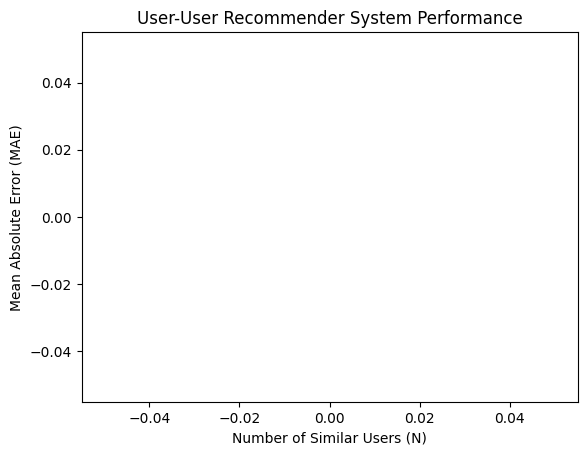

In [160]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the user-user similarity
user_similarity = cosine_similarity(normalized_ratings)
np.fill_diagonal(user_similarity, 0)
user_similarity_df = pd.DataFrame(user_similarity, index=normalized_ratings.index, columns=normalized_ratings.index)

# Method to find top N neighbors
def find_n_neighbors(df, n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(axis=1, func=lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index,
                                                   index=['top{}'.format(i) for i in range(1, n+1)]))
    return df

# Find top N neighbors for each user
N_values = [10, 20, 30, 40, 50]
top_N_neighbors = {N: find_n_neighbors(user_similarity_df, N) for N in N_values}

# Implement K-folds validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

kf = KFold(n_splits=5)

mae_results = {}

for N in N_values:
    mae_list = []
    for train_index, test_index in kf.split(normalized_ratings):
        train_set = normalized_ratings.iloc[train_index]
        test_set = normalized_ratings.iloc[test_index]

        user_similarity_train = cosine_similarity(train_set)
        np.fill_diagonal(user_similarity_train, 0)

        user_prediction = predict(train_set, user_similarity_train, type='user')
        user_prediction = pd.DataFrame(user_prediction, index=train_set.index, columns=train_set.columns)

        # Ensure test indices are within bounds
        test_index = test_set.index.intersection(user_prediction.index)
        train_index = train_set.index.intersection(user_prediction.index)

        predicted_ratings = user_prediction.loc[test_index].values
        actual_ratings = test_set.loc[test_index].values

        # Check if both actual and predicted ratings have non-zero elements
        non_zero_indices = actual_ratings.nonzero()[0]
        if len(non_zero_indices) > 0:
            mae = mean_absolute_error(actual_ratings[non_zero_indices].flatten(), predicted_ratings[non_zero_indices].flatten())
            mae_list.append(mae)
    
    if len(mae_list) > 0:
        mae_results[N] = np.mean(mae_list)
    else:
        mae_results[N] = np.nan  # Set MAE to NaN if no non-zero elements found


# Plot MAE against N
import matplotlib.pyplot as plt

plt.plot(list(mae_results.keys()), list(mae_results.values()))
plt.xlabel('Number of Similar Users (N)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('User-User Recommender System Performance')
plt.show()


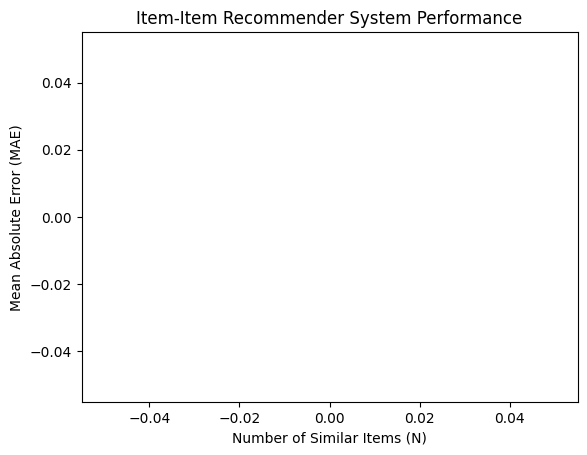

In [164]:
# Calculate the item-item similarity
item_similarity = cosine_similarity(normalized_ratings.T ) #TRANSPOSE TO GET ITEM-USER MATIX
np.fill_diagonal(item_similarity, 0)
item_similarity_df = pd.DataFrame(item_similarity, index=normalized_ratings.columns, columns=normalized_ratings.columns)

# Find top N similar items for each item
top_N_similar_items = {N: find_n_neighbors(item_similarity_df, N) for N in N_values}

# Implement K-folds validation for item-item CF
mae_results_item = {}

for N in N_values:
    mae_list = []
    for train_index, test_index in kf.split(normalized_ratings):
        train_set = normalized_ratings.iloc[train_index]
        test_set = normalized_ratings.iloc[test_index]

        user_similarity_train = cosine_similarity(train_set)
        np.fill_diagonal(user_similarity_train, 0)

        user_prediction = predict(train_set, user_similarity_train, type='user')
        user_prediction = pd.DataFrame(user_prediction, index=train_set.index, columns=train_set.columns)

        # Ensure test indices are within bounds
        test_index = test_set.index.intersection(user_prediction.index)
        train_index = train_set.index.intersection(user_prediction.index)

        predicted_ratings = user_prediction.loc[test_index].values
        actual_ratings = test_set.loc[test_index].values

        # Check for NaN values in actual and predicted ratings
        nan_mask = ~np.isnan(actual_ratings) & ~np.isnan(predicted_ratings)
        if np.any(nan_mask):
            mae = mean_absolute_error(actual_ratings[nan_mask], predicted_ratings[nan_mask])
            mae_list.append(mae)
    
    if len(mae_list) > 0:
        mae_results[N] = np.mean(mae_list)
    else:
        mae_results[N] = np.nan  # Set MAE to NaN if no valid values found


# Plot MAE against N for item-item CF
plt.plot(list(mae_results_item.keys()), list(mae_results_item.values()))
plt.xlabel('Number of Similar Items (N)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Item-Item Recommender System Performance')
plt.show()


## part 12

In [165]:
# 12 
top_10_products = user_item.sum(axis=0).sort_values(ascending=False).head(10)
print("Top 10 Products by User Sum Ratings:")
print(top_10_products)


Top 10 Products by User Sum Ratings:
productId
B00001P4ZH    267.0
B0002H02ZY    228.0
B00001WRSJ    204.0
B00LP6CFEC    198.0
B00STP86CW    189.0
B00018MSNI    158.0
B00BN0N0LW    140.0
B004WODP20    140.0
B004Y8N9KM    133.0
B000ULAP4U    129.0
dtype: float64


## END

In [182]:
from sklearn.metrics.pairwise import cosine_similarity

In [183]:
# Calculate the user-user similarity
user_similarity = cosine_similarity(user_item)
np.fill_diagonal(user_similarity, 0)
user_similarity_df = pd.DataFrame(user_similarity,index=user_item.index, columns=user_item.index)
user_similarity_df.head()

userId,A10AKZ1VFMNCT4,A10M0GF5ZFODYU,A10ZFE6YE0UHW8,A11P105WVK5240,A11Y478PJDW2QV,A12BWNW5Q5VYQ5,A12DQZKRKTNF5E,A132CBT7KF85K9,A13BX9O5UDBILC,A13L45CSY7TEQZ,...,AYPIF2S8P3RZT,AYVUFVX51BGR9,AYWN5NVIV5VWI,AYYF1X8OSTPBM,AZ0SIZRQWN7RC,AZFJMFNXIM3LA,AZG946II7J0MO,AZKRFNQ8EFO4T,AZMY6E8B52L2T,AZXFS8GCTSQ5R
userId,,,,,,,,,,,,,,,,,,,,,
A10AKZ1VFMNCT4,0.0,0.000000,0.0,0.000000,0.0,0.063919,0.0,0.000000,0.0,0.072455,...,0.0,0.041896,0.0,0.0,0.000000,0.042055,0.0,0.00000,0.0,0.000000
A10M0GF5ZFODYU,0.0,0.000000,0.0,0.090211,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.038036,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000
A10ZFE6YE0UHW8,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.072402,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.06108,0.0,0.016877
A11P105WVK5240,0.0,0.090211,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.084395,...,0.0,0.000000,0.0,0.0,0.132026,0.000000,0.0,0.00000,0.0,0.000000
A11Y478PJDW2QV,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.173553,0.000000,0.0,0.00000,0.0,0.000000


In [184]:
# Calculate the item-item similarity
item_similarity = cosine_similarity(item_User)
np.fill_diagonal(item_similarity, 0)
item_similarity_df = pd.DataFrame(item_similarity, index=item_User.index, columns=item_User.index)
item_similarity_df.head()

productId,B000001OMI,B00000JBHP,B00000JCTD,B00001P4XA,B00001P4ZH,B00001P505,B00001W0D4,B00001W0D5,B00001W0DC,B00001W0DD,...,B01H7KQ1Q2,B01H83D4VS,B01H8UHEW6,B01HB6JVW8,B01HBMOGGI,B01HCU1ERI,B01HD2EOQI,B01HD3OAL6,B01HDD5FME,B01HDUTJ88
productId,,,,,,,,,,,,,,,,,,,,,
B000001OMI,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
B00000JBHP,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
B00000JCTD,0.0,0.0,0.0,0.000000,0.000000,0.00000,1.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
B00001P4XA,0.0,0.0,0.0,0.000000,0.266616,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.13901
B00001P4ZH,0.0,0.0,0.0,0.266616,0.000000,0.18442,0.0,0.0,0.0,0.088099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [185]:
# Method to find top N neighbors
def find_n_neighbors(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(axis=1, func=lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index,
                                                   index=['top{}'.format(i) for i in range(1, n+1)]))
    return df

In [186]:
# Find 10 neighbors of each user
user_10_neighbors = find_n_neighbors(user_similarity_df, 10)
user_10_neighbors.head(10)

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
userId,,,,,,,,,,
A10AKZ1VFMNCT4,A6QB9H96MJKHH,A2BAPDGCCVC4S6,A39EZIC80Q2K5D,A2YJ6BZ4H3QCZ7,A1KFMQQ3WDG77,A395N4YTYU0UUF,AJ9C1N8A6FO8W,A2DKQQIZ793AV5,A26RIG340ORKA0,A3H7W0DDG266QY
A10M0GF5ZFODYU,A1APGU5L0DWCR1,A3M43T9QDYC1DY,A2C4HZMBNOTPPI,A20YIR5B3E5Z7K,A27LB0VUIXIX8H,AVBIZCFWZFMSK,A3VYTHBU44KOWE,A77ZG8QSXF54Y,A2F2F6SXBHWMNW,A3H7W0DDG266QY
A10ZFE6YE0UHW8,AAA0TUKS5VBSA,A1VGHTDOZXOOYP,A2NYK9KWFMJV4Y,A3S3R88HA0HZG3,A1XJOSJN6FHFO0,A3MFORLOKIOEQY,A3OXHLG6DIBRW8,A37MH7ICH80QOX,A1AAIT9BEO3OL2,A2DIQTZPF26T1L
A11P105WVK5240,A1RHGM59GJBK8V,A1HW4M029I31C8,A1MS940PRC216J,A2C4HZMBNOTPPI,A2O6AAW9WZ1XJB,AS8C336DDLSO4,A9KOC3PXLXYSB,A30Y2F3FOQBB2R,A3H7W0DDG266QY,AWO32HN0KS1HC
A11Y478PJDW2QV,A1T1YSCDW0PD25,A2UJW6DKFDEPAS,A1NHOO6HXE7QSW,A186R37OQQ8TP1,AZ0SIZRQWN7RC,A3LWC833HQIG7J,A36WTQL2AW6NR5,A3SXAO3MWOPIB5,A2Z1NCJN5ATMJ7,A36ARO7W03JMXV
A12BWNW5Q5VYQ5,A979ON3H1O593,A3FH2LTPJU3NXR,A2SER0RF45PIWH,AXNB3E5JBW5OX,A225G2TFM76GYX,A3MCDY9ZWZ1TVQ,A18ZC4NAZ5L5UR,AO6IWD0T66LSN,A3QB1CFD3FX59C,AI0NWR72MJ6UG
A12DQZKRKTNF5E,A3V7D0LH8L7BG0,A1L1S42BOGPF96,ADLVFFE4VBT8,APWDWVAPZ2RAS,A2N6850P9TDYFW,AJZFT4AFY3EUG,AOYAZN4MA0TVU,AAC6H648IWEKT,AVBIZCFWZFMSK,ACHTDPEQYSEQL
A132CBT7KF85K9,ANDKLEDIFTKY1,A145LBW8ZHF0TW,A2IZUJH0DG5RW7,A2RGKDL0ADPLSW,A1SZ2USQL586U6,A9TJ1ZSTUF9BV,A2NA9VZN5VA9GW,A3URABIN1GOPWC,A3I7BGZ2V0ZH3J,A1L5PM0IE9TIPH
A13BX9O5UDBILC,A3KZEGBTPH6MMF,A16QODENBJVUI1,A70NFM6KHU24F,AFCAZIM440BI4,ABVYGB2TKBO8F,A2YKWYC3WQJX5J,A3I9Q7TS5FQY0W,A2DIQTZPF26T1L,AU84I1LEPOSES,A1ZCSSCAGBCD49


In [187]:
# Find 10 neighbors of each item
item_10_neighbors = find_n_neighbors(item_similarity_df, 10)
item_10_neighbors.head(10)

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
productId,,,,,,,,,,
B000001OMI,B0085OUIMI,B0002MPMKE,B000IK4C24,B00APRSD5W,B00005105L,B000QJBG2G,B00NH8OXZK,B01CEFLFF2,B00008Z1PT,B000FJ20CM
B00000JBHP,B003FMUP2S,B010UU4G1S,B00EPAVJZ6,B000065BPA,B005MI8NHM,B00DSN6OGA,B00009RDIF,B009IBXSV0,B00NVG9Z6K,B00EDOADCO
B00000JCTD,B00008VE1B,B0002T3UQK,B00001W0D4,B00007EDM8,B000001OMI,B00TDLG1XM,B00TF1YDH6,B00TF2HCJQ,B00TF3AZZ8,B00TF48BAS
B00001P4XA,B000065BPC,B017H0371E,B0007N55NC,B0015AFOL4,B001GUNJPG,B000ISP3QA,B00004TZJQ,B00004TZJJ,B004OBZ2UY,B0100XGCU8
B00001P4ZH,B0006B486K,B00001P4XA,B000089GN3,B00005N9D3,B006K55662,B006BUN6ZE,B0178J2V3E,B00001P505,B00CIQ88UI,B00004SY4H
B00001P505,B012VO2BXQ,B00SWPTH5Y,B00IMEQ5I2,B01DF1742C,B009KNO1IU,B000XG3QCU,B00V31USC0,B00K8E84R4,B00F5NSLCG,B003V9RWEO
B00001W0D4,B00008VE1B,B00000JCTD,B0002T3UQK,B00007EDM8,B000001OMI,B00TDLG1XM,B00TF1YDH6,B00TF2HCJQ,B00TF3AZZ8,B00TF48BAS
B00001W0D5,B00061IU9G,B0007N55NW,B00004Z7G9,B0002D03ZW,B0007N55NM,B0002EXJPM,B000065BPB,B0002H02ZY,B00TJWOMCC,B00TF48BAS
B00001W0DC,B000TXRJMK,B000M21BXQ,B003BT6A1U,B001ADXR3I,B000QRCRP8,B00CBNG10C,B00004T8R2,B000001OMI,B00TIAYQEY,B00TF3AZZ8


In [188]:
def get_users_similar_products(user1, user2):
    common_products = ratings[ratings.userId == user1].merge(
    ratings[ratings.userId == user2],
    on = "productId",
    how = "inner" )
    return common_products[['rating_x', 'rating_y', 'productId']].head()

In [189]:
get_users_similar_products('A10AKZ1VFMNCT4', 'A27FMJ1TSH64DA')

,rating_x,rating_y,productId
0,5.0,4.0,B00YOVI6UW


In [190]:
# Method to predict the rating
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [191]:
import time


In [192]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1).values[:, np.newaxis]  # Convert to numpy array
        ratings_diff = (ratings - mean_user_rating)
        pred = mean_user_rating + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

# Predict the ratings for both UBCF and IBCF
st = time.time()
user_prediction = predict(user_item, user_similarity, type='user')
user_prediction = pd.DataFrame(user_prediction, index=user_item.index, columns=user_item.columns)
user_prediction.head()

item_prediction = predict(user_item, item_similarity, type='item')
print('Time taken %.2fs to find out the user and item prediction' % (time.time()-st))


Time taken 0.48s to find out the user and item prediction


In [193]:
# Method to Recommend the items with the highest predicted ratings
def recommend_items(userId, orig_df, preds_df, top_n):
    # Get and sort the user's ratings
    sorted_user_ratings = orig_df.loc[userId].sort_values(ascending=False) #sorted_user_ratings
    sorted_user_predictions = preds_df.loc[userId].sort_values(ascending=False) #sorted_user_predictions

    # Prepare recommendations
    recommedations = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    recommedations.index.name = 'Recommended Items'
    recommedations.columns = ['user_ratings', 'user_predictions']
    
    # Take the products which user has NOT rated
    recommedations = recommedations.loc[recommedations.user_ratings == 0] 
    recommedations = recommedations.sort_values('user_predictions', ascending=False)
    return recommedations.head(top_n)

In [194]:
# Find recommendation for couple of users using UBCF
find_recom = {'A10AKZ1VFMNCT4': 6}   # This list is user, top_n recommendation dict.
for user in find_recom:
    print("Top %d recommendations for the userId: %s" %(find_recom[user],user))
    recommend_items(user, user_item, user_prediction, find_recom[user])
    print("\n") 

Top 6 recommendations for the userId: A10AKZ1VFMNCT4




In [152]:
from scipy.sparse import csr_matrix

# Assuming user_item is a DataFrame
user_item_sparse = csr_matrix(user_item.values)


In [148]:
from scipy.sparse.linalg import svds

# Trying out different latent factors
svd_list = [svds(user_item_sparse, k=k) for k in [10, 20, 30, 40, 50]]
pred_list = [pd.DataFrame(np.dot(np.dot(svd[0], np.diag(svd[1])), svd[2]), 
                          index=user_item.index, 
                          columns=user_item.columns) for svd in svd_list]
RMSE_list = [round((((user_item.mean() - pred.mean()) ** 2).mean() ** 0.5), 5) for pred in pred_list]
RMSE_list


[0.01007, 0.00856, 0.00685, 0.00655, 0.00581]

In [155]:
U, sigma, Vt = svds(user_item_sparse, k=5)


In [156]:
from scipy.sparse.linalg import svds
import numpy as np

# Perform Singular Value Decomposition (SVD)
# k = 5  # Number of singular values and vectors to compute
# U, sigma, Vt = svds(user_item, k=5)io

# Construct diagonal array in SVD
sigma = np.diag(sigma)

# Print the shape of the decomposed matrices
print('Shape of the Left Singular matrix          :', U.shape)
print('Shape of the Latent Factor Diagonal matrix :', sigma.shape)
print('Shape of the Right Singular matrix         :', Vt.shape)
U.shape, sigma.shape, Vt.shape


Shape of the Left Singular matrix          : (735, 5)
Shape of the Latent Factor Diagonal matrix : (5, 5)
Shape of the Right Singular matrix         : (5, 3238)


((735, 5), (5, 5), (5, 3238))

In [157]:
# Predicted ratings
svd_prediction = pd.DataFrame(np.dot(np.dot(U, sigma), Vt), index=user_item.index, columns=user_item.columns)
svd_prediction.head()

productId,B000001OMI,B00000JBHP,B00000JCTD,B00001P4XA,B00001P4ZH,B00001P505,B00001W0D4,B00001W0D5,B00001W0DC,B00001W0DD,...,B01H7KQ1Q2,B01H83D4VS,B01H8UHEW6,B01HB6JVW8,B01HBMOGGI,B01HCU1ERI,B01HD2EOQI,B01HD3OAL6,B01HDD5FME,B01HDUTJ88
userId,,,,,,,,,,,,,,,,,,,,,
A10AKZ1VFMNCT4,0.006132,0.000913,-0.000209,0.013119,0.229265,0.020933,-0.000209,-0.000547,0.000109,0.011148,...,0.057943,0.003889,0.003547,-0.000356,-0.000639,-0.006257,0.006744,0.052682,0.000041,0.001735
A10M0GF5ZFODYU,0.003721,0.003328,0.000092,0.027194,0.220454,0.023164,0.000092,0.002579,0.000329,0.002544,...,0.004086,-0.000428,-0.000243,-0.001066,-0.000254,-0.000977,0.003616,0.017694,-0.000036,0.000244
A10ZFE6YE0UHW8,0.002688,0.017732,0.000388,0.019726,0.041528,0.011858,0.000388,0.000202,0.000484,0.001123,...,-0.007349,0.005023,-0.003976,0.016296,0.003307,0.007749,-0.001956,0.052084,0.000182,0.000167
A11P105WVK5240,0.010947,0.012456,0.000378,0.084725,0.653819,0.069478,0.000378,0.008043,0.001101,0.006242,...,0.003827,-0.002284,-0.003543,-0.004473,-0.000579,-0.005775,0.010013,0.036598,-0.000185,0.000452
A11Y478PJDW2QV,0.006146,0.008176,0.000233,0.047072,0.356854,0.038558,0.000233,0.004331,0.000639,0.003524,...,0.002022,-0.000413,-0.001364,-0.000349,0.000122,-0.000704,0.005280,0.024786,-0.000021,0.000263


In [159]:
# Find recommendation for couple of users
find_recom = {'A10AKZ1VFMNCT4': 6, 
              'A10M0GF5ZFODYU': 3, 
              'A10ZFE6YE0UHW8': 8}   # This list is user, top_n recommendation dict.
for user in find_recom:
    print("Top %d recommendations for the userId: %s" %(find_recom[user],user))
    recommend_items(user, user_item, svd_prediction, find_recom[user])
    print("\n") 

Top 6 recommendations for the userId: A10AKZ1VFMNCT4


Top 3 recommendations for the userId: A10M0GF5ZFODYU


Top 8 recommendations for the userId: A10ZFE6YE0UHW8




RMSE

In [160]:
# Method to calculate RMSE for different model
def calculate_rmse(orig_df, preds_df):
    rmse_df = pd.concat([orig_df.mean(), preds_df.mean()], axis=1)
    rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
    RMSE = round(np.sqrt(((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean()), 5)
    print('\nRMSE for this recommender model = {}\n'.format(RMSE))
    return rmse_df.head()

Evaluation of User Based CF

In [161]:
calculate_rmse(user_item, user_prediction)


RMSE for this recommender model = 0.009



,Avg_actual_ratings,Avg_predicted_ratings
productId,,
B000001OMI,0.023129,0.020827
B00000JBHP,0.024490,0.023126
B00000JCTD,0.006803,0.000110
B00001P4XA,0.069388,0.085076
B00001P4ZH,0.363265,0.522886


Evaluation of Item Based CF


In [162]:
calculate_rmse(user_item, item_prediction)


RMSE for this recommender model = nan



,Avg_actual_ratings,Avg_predicted_ratings
B000001OMI,0.023129,NaN
B00000JBHP,0.024490,NaN
B00000JCTD,0.006803,NaN
B00001P4XA,0.069388,NaN
B00001P4ZH,0.363265,NaN


Evaluation of Matrix Factorization based CF

In [163]:
calculate_rmse(user_item, svd_prediction)


RMSE for this recommender model = 0.01074



,Avg_actual_ratings,Avg_predicted_ratings
productId,,
B000001OMI,0.023129,0.007886
B00000JBHP,0.024490,0.010310
B00000JCTD,0.006803,0.000204
B00001P4XA,0.069388,0.052678
B00001P4ZH,0.363265,0.422382
